# Regime Partitioning from Trajectory Based Methods

## Introduction

In previous attempts, we have used PCA to convert our data into clusters. However, this can be cumbersome as we don't know what transformations PCA will do that could affect the clustering.

Because of this, we instead used the three operating conditions to cluster our data and implemented standardization on each of them. From this, created a dataset that is incredibly similar to our CMAPSS dataset.

## Data

We obtain our initial data without any changes to it.

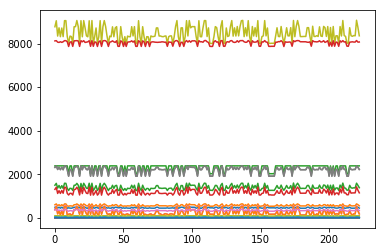

In [1]:
import data_tools as dt
import data_dir as dd
import matplotlib.pyplot as plt
import numpy as np

data = dt.import_nasa_dataset(dd.PHM_TRAIN)

plt.plot(data[:223, 5:])
plt.show()

## Classify Based on Operating Condition

We then analyze the three operating conditions in our dataset [2, 3, 4] and create clusters based on their position in an xyz-plane.

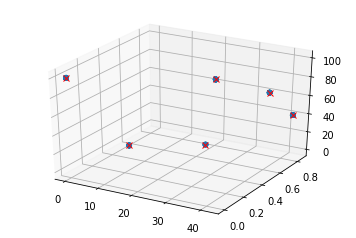

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

kmeans = KMeans(n_clusters=6).fit(data[:, 2:5])

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(data[:223, 2], data[:223, 3], data[:223, 4])
ax.plot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 'rx')

plt.show()

From these clusters, we use standardization based on the paper, ***Enhanced Trajectory Based Similarity Prediction with Uncertainty Quantification***. The equation goes as follows:

$$x'_i = \frac{x^p_i - \mu^p}{\sigma^p}$$

Where p is the regime (cluster) of a given data point.

/home/jsb/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in divide


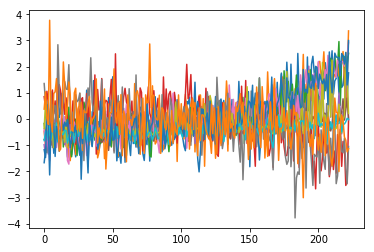

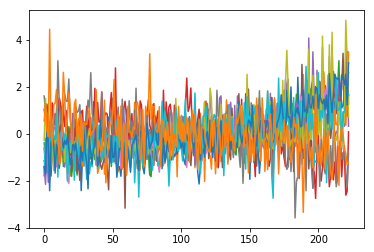

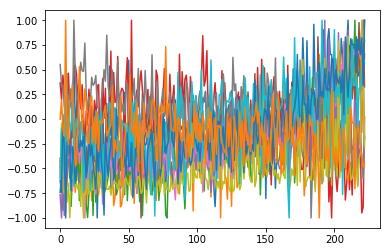

In [4]:
clusters = kmeans.predict(data[:, 2:5]).reshape(-1, 1)

regimes = []
for i in xrange(6):
    regimes.append(np.where(clusters == i)[0])

test_data = np.copy(data[:, 5:])
for i in xrange(len(regimes)):
    mean = test_data[regimes[i]].mean(axis=0)
    std = test_data[regimes[i]].std(axis=0)
    test_data[regimes[i]] = np.divide(np.subtract(test_data[regimes[i]], mean), std)

min = test_data[:, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]].min()
max = test_data[:, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]].max()

#test_data[:, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]] = np.divide(np.subtract(
#test_data[:, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]], min), max - min)

plt.plot(test_data[:223, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]])
plt.show()

from sklearn import preprocessing
plt.plot(preprocessing.scale(test_data[:223, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]]))
plt.show()

plt.plot(preprocessing.minmax_scale(test_data[:223, [1, 2, 3, 6, 7, 8, 10, 11, 12, 13, 14, 19]], (-1, 1)))
plt.show()

As we can see from above, this creates 3 trends, where there end results are upwards, downwards, and center.

SENSOR  1 :


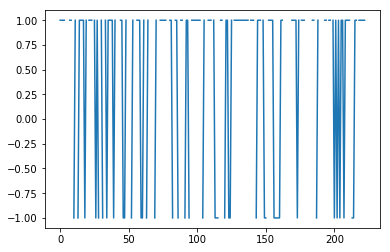

SENSOR  2 :


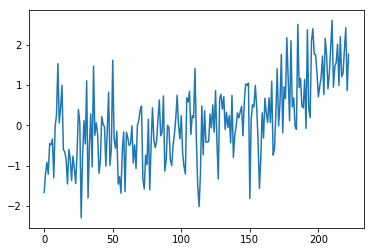

SENSOR  3 :


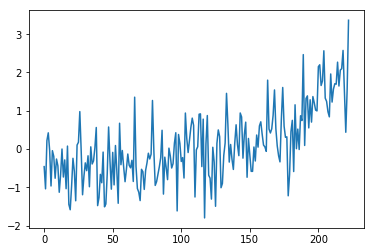

SENSOR  4 :


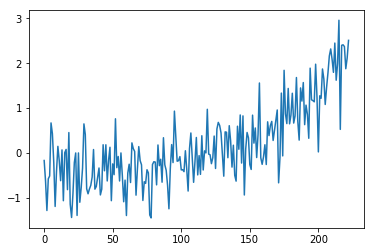

SENSOR  5 :


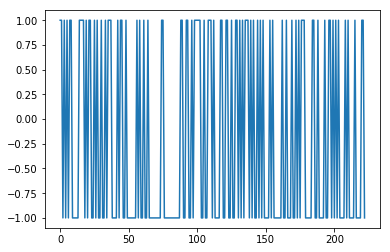

SENSOR  6 :


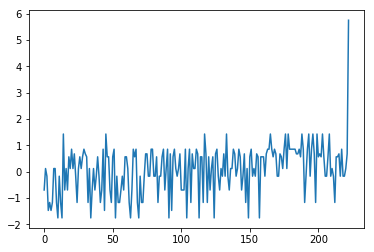

SENSOR  7 :


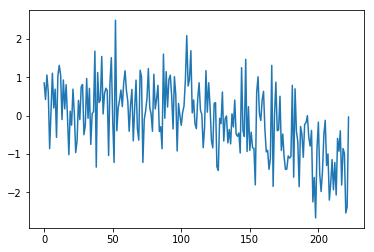

SENSOR  8 :


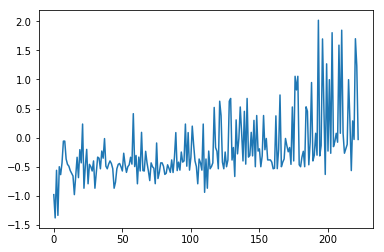

SENSOR  9 :


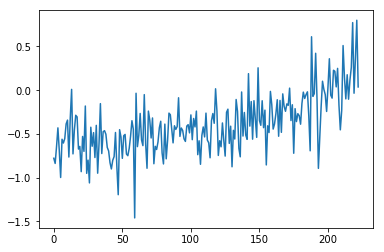

SENSOR  10 :


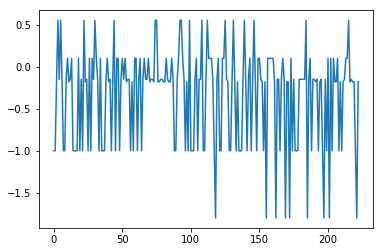

SENSOR  11 :


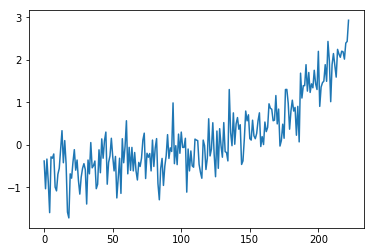

SENSOR  12 :


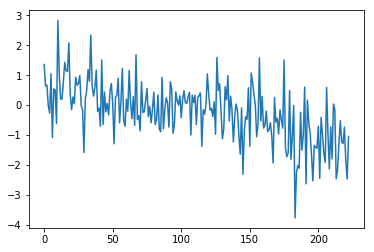

SENSOR  13 :


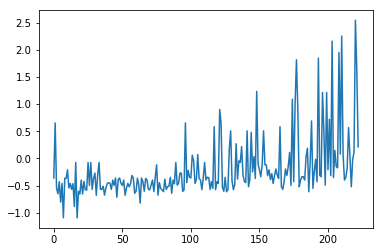

SENSOR  14 :


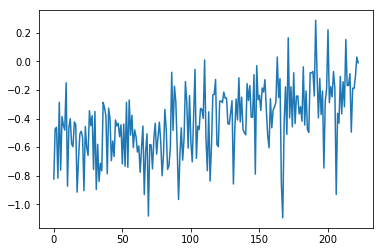

SENSOR  15 :


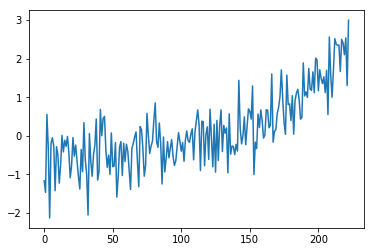

SENSOR  16 :


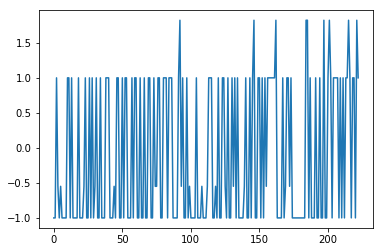

SENSOR  17 :


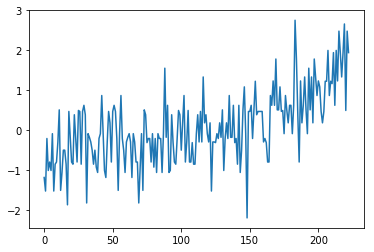

SENSOR  18 :


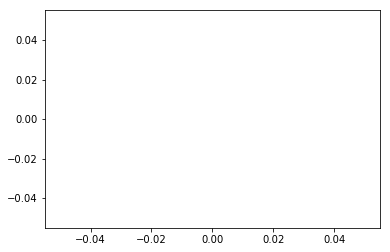

SENSOR  19 :


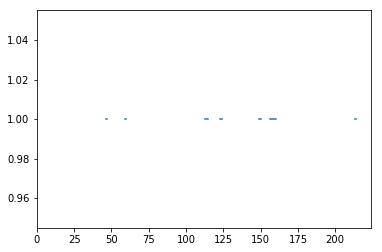

SENSOR  20 :


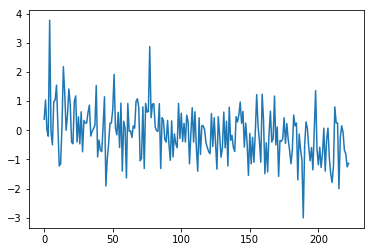

SENSOR  21 :


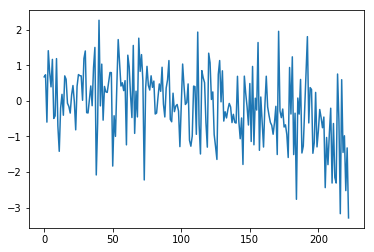

In [5]:
for i in xrange(test_data.shape[1]):
    print "SENSOR ", i + 1, ":"
    plt.plot(test_data[:223, i])
    plt.show()

We will be tossing out unnecessary sensors and keeping:
[2, 3, 7, 8, 9, 11, 12, 13, 14, 15, 20]

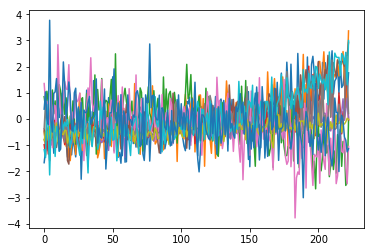

In [6]:
from sklearn import preprocessing
plt.plot(test_data[:223, [1, 2, 6, 7, 8, 10, 11, 12, 13, 14, 19]])
plt.show()

In [7]:
regime_phm_data = dt.get_regime_partitioned_units(dd.PHM_TRAIN)

minimum = regime_phm_data[0].min()
maximum = regime_phm_data[0].max()
for unit in regime_phm_data:
    if minimum > unit.min():
        minimum = unit.min()
    if maximum < unit.max():
        maximum = unit.max()

print min, max

-4.22245971095 9.39949031058


data_tools.py:167: RuntimeWarning: invalid value encountered in divide
  data[regime, 5:] = np.divide(np.subtract(data[regime, 5:], mean), std)


CMAPSS 1


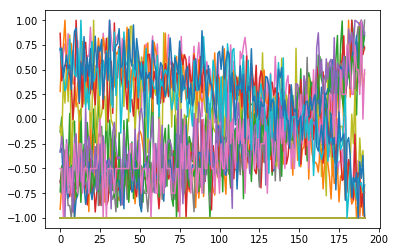

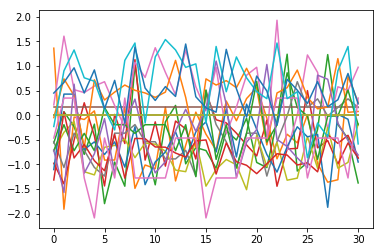

CMAPSS 2


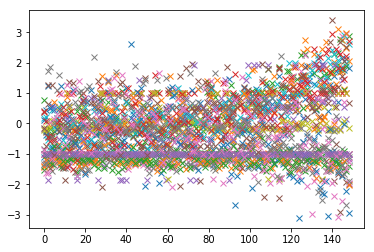

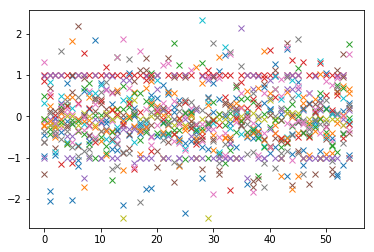

CMAPSS 3


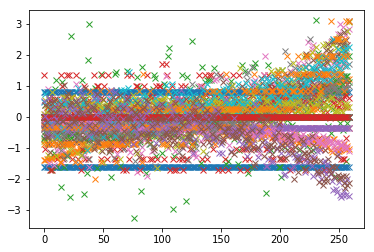

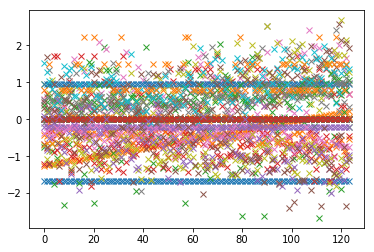

CMAPSS 4


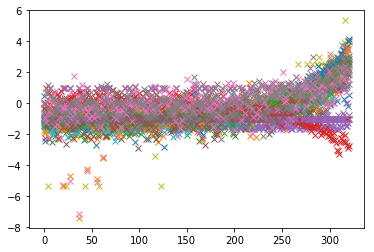

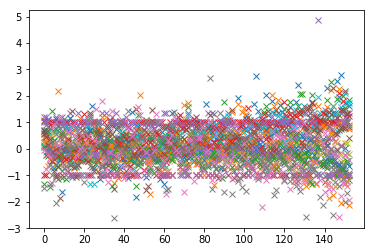

PHM


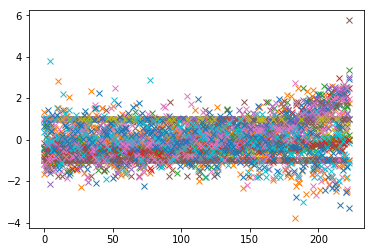

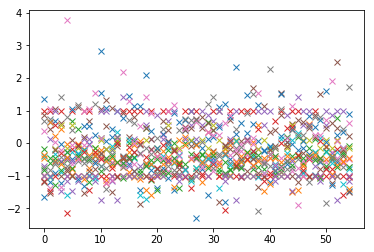

PHM TEST[0]


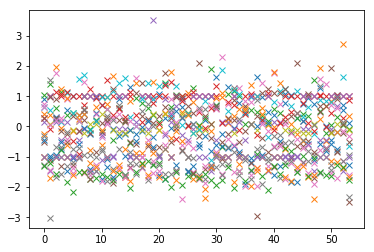

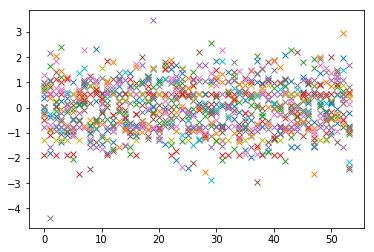

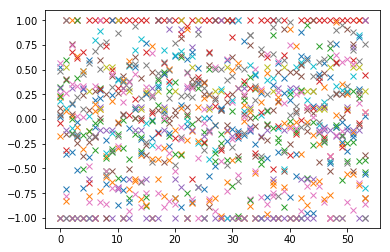

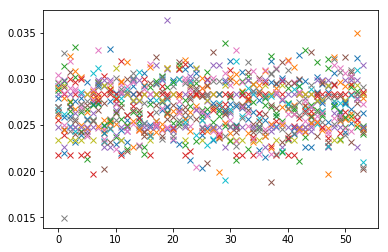

In [8]:
sensors = [6, 7, 8, 11, 12, 13, 15, 16, 17, 18, 19, 24]

print "CMAPSS 1"
plt.plot(preprocessing.minmax_scale(dt.get_nasa_units(dd.CMAPSS_TRAIN_1)[0][:, 5:], (-1, 1)))
plt.show()
plt.plot(dt.get_nasa_units(dd.CMAPSS_TEST_1)[0][:, 5:])
plt.show()

print "CMAPSS 2"
plt.plot(dt.get_regime_partitioned_units(dd.CMAPSS_TRAIN_2)[0][:, 5:], 'x')
plt.show()
plt.plot(dt.get_regime_partitioned_units(dd.CMAPSS_TEST_2)[1][:, 5:], 'x')
plt.show()

print "CMAPSS 3"
plt.plot(dt.get_nasa_units(dd.CMAPSS_TRAIN_3)[0][:, :], 'x')
plt.show()
plt.plot(dt.get_nasa_units(dd.CMAPSS_TEST_3)[1][:, :], 'x')
plt.show()

print "CMAPSS 4"
plt.plot(dt.get_regime_partitioned_units(dd.CMAPSS_TRAIN_4)[0][:, 5:], 'x')
plt.show()
plt.plot(dt.get_regime_partitioned_units(dd.CMAPSS_TEST_4)[1][:, 5:], 'x')
plt.show()

print "PHM"
indices = np.where(data[:, 0] == 1)[0]
plt.plot(test_data[indices[0]:indices[len(indices) - 1]+1, :], 'x')
plt.show()
plt.plot(dt.get_regime_partitioned_units(dd.PHM_TRAIN)[0][:55, 5:], 'x')
plt.show()
print "PHM TEST[0]"
plt.plot(dt.get_regime_partitioned_units(dd.PHM_TEST)[0][:, 5:], 'x')
plt.show()
plt.plot(preprocessing.scale(dt.get_regime_partitioned_units(dd.PHM_TEST)[0][:, 5:]), 'x')
plt.show()
plt.plot(preprocessing.minmax_scale(dt.get_regime_partitioned_units(dd.PHM_TEST)[0][:, 5:], (-1, 1)), 'x')
plt.show()
plt.plot(np.divide(np.subtract(preprocessing.scale(dt.get_regime_partitioned_units(dd.PHM_TEST)[0][:, 5:]), minimum), maximum - minimum), 'x')
plt.show()

(29820, 21)


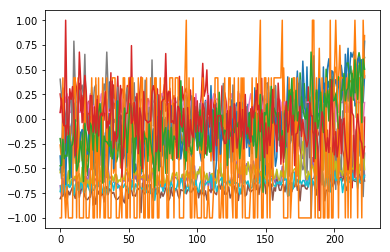

In [10]:
clusters = kmeans.predict(dt.import_nasa_dataset(dd.PHM_TEST)[:, 2:5]).reshape(-1, 1)

regimes = []
for i in xrange(6):
    regimes.append(np.where(clusters == i)[0])

# test_data_2 = np.copy(data[:, 5:])
test_data_2 = dt.import_nasa_dataset(dd.PHM_TEST)[:, 5:]
for i in xrange(len(regimes)):
    minimum = np.amin(test_data[regimes[i]], axis=0)
    maximum = np.amax(test_data[regimes[i]], axis=0)
    test_data_2[regimes[i]] = np.subtract(np.multiply(2, np.divide(np.subtract(test_data[regimes[i]], minimum), 
                                                         np.subtract(maximum, minimum))), 1)

print test_data_2.shape
plt.plot(test_data_2[:223, [1, 2, 3, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 19]])
plt.show()

## Conclusion

As we can see from above, our CMAPSS data is very similar to our PHM data. Because of this, we should be able to train our CMAPSS data more directly with transitive results to our PHM dataset, allowing more training data and testing data.